In [1]:
import pandas as pd
import os

n_cities = 3
species = 'BIDEP'
n_species = len(species)
results_folder = 'results'
data = [n_species*[None] for i in range(n_cities)]

for i in range(n_cities):
    for s in range(n_species):
        data[i][s] = pd.read_csv(filepath_or_buffer=os.path.join(results_folder, f'life#{species[s]}[{i}].csv'), sep=',', header=None)
        data[i][s].columns = ['Time', 'Mean', 'SD', 'CI']

print(data[0][0])

      Time    Mean         SD        CI
0      0.0    0.00   0.000000  0.000000
1      1.0    0.09   0.287623  0.057064
2      2.0    0.13   0.393251  0.078020
3      3.0    0.23   0.489382  0.097092
4      4.0    0.29   0.537390  0.106617
..     ...     ...        ...       ...
995  995.0  340.13  34.041761  6.753788
996  996.0  340.49  33.958529  6.737276
997  997.0  340.84  34.035549  6.752556
998  998.0  341.10  34.016781  6.748833
999  999.0  341.44  34.129675  6.771230

[1000 rows x 4 columns]


In [2]:
for i in range(n_cities):
    print(data[i][species.index('B')]['Mean']
        .combine(data[i][species.index('I')]['Mean'], lambda x,y: x+y)
        .combine(data[i][species.index('D')]['Mean'], lambda x,y: x-y)
        .combine(data[i][species.index('E')]['Mean'], lambda x,y: x-y))

0        0.00
1        0.71
2        1.47
3        2.12
4        2.75
        ...  
995    150.94
996    151.12
997    151.25
998    151.11
999    151.33
Name: Mean, Length: 1000, dtype: float64
0        0.00
1        0.00
2        0.01
3        0.07
4        0.18
        ...  
995    150.35
996    150.38
997    150.48
998    150.63
999    150.89
Name: Mean, Length: 1000, dtype: float64
0       0.00
1       0.11
2      -0.06
3       0.14
4       0.12
       ...  
995    61.68
996    61.77
997    61.74
998    61.89
999    61.90
Name: Mean, Length: 1000, dtype: float64


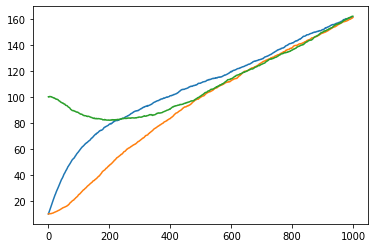

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(n_cities):
    ax.plot(data[i][species.index('P')]['Time'], data[i][species.index('P')]['Mean'])

plt.show()

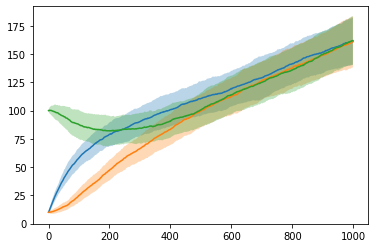

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(n_cities):
    time = data[i][species.index('P')]['Time']
    mean = data[i][species.index('P')]['Mean']
    sd = data[i][species.index('P')]['SD']
    ax.plot(time, mean)
    ax.fill_between(time, mean-sd, mean+sd, alpha=0.3)

plt.show()